In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest_cv_1.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in haxby_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100, embedding_dim=2)

10/02/2020 20:38:20 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/02/2020 20:38:21 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/02/2020 20:38:22 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/02/2020 20:38:23 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run05_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/02/2020 20:38:24 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run06_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Fina

In [7]:
dtfa.num_voxels

32233

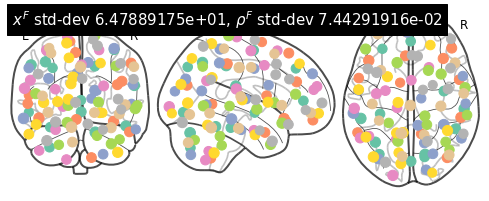

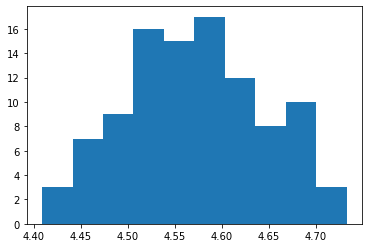

(<nilearn.plotting.displays.OrthoProjector at 0x7f92a4865890>,
 tensor([[-31.4691, -30.7792, -22.7244],
         [ 35.6964,  -6.7893,  58.7894],
         [ 48.0140, -46.5109, -21.4621],
         [-36.4670, -60.5318,  45.9535],
         [-29.0095,  37.6944,  39.6276],
         [  0.7263,  45.6265,   5.5938],
         [  1.0691, -80.6385,  -6.5467],
         [ 15.3789, -76.0620,  41.2566],
         [-51.6971, -35.5738,  42.6712],
         [ 56.9246, -25.4712,  21.1721],
         [-54.0172,  -5.6233,  -7.0354],
         [ 15.9207, -73.5430, -28.1238],
         [-32.2330, -73.2060, -43.8475],
         [ 35.0186,  27.5186, -16.6242],
         [-10.4112,   2.0563,  67.4119],
         [ -4.7970,  30.2917,  55.7689],
         [ 39.1146, -76.8143,  21.9642],
         [ 43.9043,  38.4478,  25.5668],
         [ 11.8494, -51.7616, -54.7234],
         [-55.1680, -50.4637,   2.0330],
         [ 51.8102,   5.2087, -27.7195],
         [-43.3621,  25.3300, -13.1192],
         [ 53.4804, -34.4585,  44.5

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

464

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=True))

10/02/2020 20:39:40 [Epoch 1] (7178ms) Posterior free-energy 8.05079757e+09 = KL from prior 1.25353660e+07 - log-likelihood -8.03826125e+09
10/02/2020 20:39:40 Saving checkpoint...
10/02/2020 20:39:46 [Epoch 2] (6744ms) Posterior free-energy 7.84333363e+09 = KL from prior 8.43086900e+06 - log-likelihood -7.83490458e+09
10/02/2020 20:39:53 [Epoch 3] (6610ms) Posterior free-energy 7.70358272e+09 = KL from prior 5.73742450e+06 - log-likelihood -7.69784474e+09
10/02/2020 20:40:00 [Epoch 4] (6619ms) Posterior free-energy 7.60423014e+09 = KL from prior 4.06463375e+06 - log-likelihood -7.60016640e+09
10/02/2020 20:40:06 [Epoch 5] (6557ms) Posterior free-energy 7.52916531e+09 = KL from prior 2.91631000e+06 - log-likelihood -7.52624998e+09
10/02/2020 20:40:13 [Epoch 6] (6613ms) Posterior free-energy 7.47046246e+09 = KL from prior 2.04846525e+06 - log-likelihood -7.46841498e+09
10/02/2020 20:40:20 [Epoch 7] (6606ms) Posterior free-energy 7.42662451e+09 = KL from prior 1.55403975e+06 - log-likeli

Epoch   409: reducing learning rate of group 0 to 5.0000e-03.
Epoch   409: reducing learning rate of group 1 to 5.0000e-04.
Epoch   409: reducing learning rate of group 2 to 5.0000e-03.
Epoch   409: reducing learning rate of group 3 to 5.0000e-04.


10/02/2020 21:24:38 [Epoch 410] (5893ms) Posterior free-energy 5.18995507e+09 = KL from prior 1.64714262e+06 - log-likelihood -5.18830643e+09
10/02/2020 21:24:44 [Epoch 411] (5902ms) Posterior free-energy 5.16086630e+09 = KL from prior 1.64742312e+06 - log-likelihood -5.15921869e+09
10/02/2020 21:24:50 [Epoch 412] (5895ms) Posterior free-energy 5.15944653e+09 = KL from prior 1.64832400e+06 - log-likelihood -5.15779891e+09
10/02/2020 21:24:56 [Epoch 413] (5919ms) Posterior free-energy 5.15882906e+09 = KL from prior 1.64594925e+06 - log-likelihood -5.15718195e+09
10/02/2020 21:25:02 [Epoch 414] (5879ms) Posterior free-energy 5.15845120e+09 = KL from prior 1.64676512e+06 - log-likelihood -5.15680410e+09
10/02/2020 21:25:07 [Epoch 415] (5899ms) Posterior free-energy 5.15789978e+09 = KL from prior 1.65856888e+06 - log-likelihood -5.15623987e+09
10/02/2020 21:25:13 [Epoch 416] (5921ms) Posterior free-energy 5.15769958e+09 = KL from prior 1.67678100e+06 - log-likelihood -5.15602278e+09
10/02/

Epoch   629: reducing learning rate of group 0 to 2.5000e-03.
Epoch   629: reducing learning rate of group 1 to 2.5000e-04.
Epoch   629: reducing learning rate of group 2 to 2.5000e-03.
Epoch   629: reducing learning rate of group 3 to 2.5000e-04.


10/02/2020 21:46:19 [Epoch 630] (5907ms) Posterior free-energy 5.13778125e+09 = KL from prior 1.70181050e+06 - log-likelihood -5.13607987e+09
10/02/2020 21:46:25 [Epoch 631] (5887ms) Posterior free-energy 5.13572454e+09 = KL from prior 1.70099100e+06 - log-likelihood -5.13402317e+09
10/02/2020 21:46:30 [Epoch 632] (5896ms) Posterior free-energy 5.13541939e+09 = KL from prior 1.70016288e+06 - log-likelihood -5.13371955e+09
10/02/2020 21:46:36 [Epoch 633] (5878ms) Posterior free-energy 5.13526221e+09 = KL from prior 1.69699950e+06 - log-likelihood -5.13356493e+09
10/02/2020 21:46:42 [Epoch 634] (5880ms) Posterior free-energy 5.13514496e+09 = KL from prior 1.69842625e+06 - log-likelihood -5.13344819e+09
10/02/2020 21:46:48 [Epoch 635] (5922ms) Posterior free-energy 5.13515520e+09 = KL from prior 1.69960012e+06 - log-likelihood -5.13345690e+09
10/02/2020 21:46:54 [Epoch 636] (5876ms) Posterior free-energy 5.13507226e+09 = KL from prior 1.69892700e+06 - log-likelihood -5.13337344e+09
10/02/

Epoch   849: reducing learning rate of group 0 to 1.2500e-03.
Epoch   849: reducing learning rate of group 1 to 1.2500e-04.
Epoch   849: reducing learning rate of group 2 to 1.2500e-03.
Epoch   849: reducing learning rate of group 3 to 1.2500e-04.


10/02/2020 22:07:48 [Epoch 850] (5804ms) Posterior free-energy 5.12854630e+09 = KL from prior 1.71404388e+06 - log-likelihood -5.12683264e+09
10/02/2020 22:07:54 [Epoch 851] (5783ms) Posterior free-energy 5.12835277e+09 = KL from prior 1.71489025e+06 - log-likelihood -5.12663859e+09
10/02/2020 22:08:00 [Epoch 852] (5802ms) Posterior free-energy 5.12830157e+09 = KL from prior 1.71541112e+06 - log-likelihood -5.12658586e+09
10/02/2020 22:08:06 [Epoch 853] (5793ms) Posterior free-energy 5.12827750e+09 = KL from prior 1.71902525e+06 - log-likelihood -5.12655667e+09
10/02/2020 22:08:12 [Epoch 854] (5801ms) Posterior free-energy 5.12815155e+09 = KL from prior 1.71539625e+06 - log-likelihood -5.12643635e+09
10/02/2020 22:08:17 [Epoch 855] (5785ms) Posterior free-energy 5.12806298e+09 = KL from prior 1.71413638e+06 - log-likelihood -5.12634778e+09
10/02/2020 22:08:23 [Epoch 856] (5806ms) Posterior free-energy 5.12803328e+09 = KL from prior 1.71680412e+06 - log-likelihood -5.12631706e+09
10/02/

Epoch   885: reducing learning rate of group 0 to 6.2500e-04.
Epoch   885: reducing learning rate of group 1 to 6.2500e-05.
Epoch   885: reducing learning rate of group 2 to 6.2500e-04.
Epoch   885: reducing learning rate of group 3 to 6.2500e-05.


10/02/2020 22:11:17 [Epoch 886] (5786ms) Posterior free-energy 5.12751462e+09 = KL from prior 1.71474638e+06 - log-likelihood -5.12579942e+09
10/02/2020 22:11:23 [Epoch 887] (5810ms) Posterior free-energy 5.12749824e+09 = KL from prior 1.71554900e+06 - log-likelihood -5.12578304e+09
10/02/2020 22:11:29 [Epoch 888] (5805ms) Posterior free-energy 5.12753613e+09 = KL from prior 1.71230175e+06 - log-likelihood -5.12582502e+09
10/02/2020 22:11:35 [Epoch 889] (5790ms) Posterior free-energy 5.12742298e+09 = KL from prior 1.71674988e+06 - log-likelihood -5.12570522e+09
10/02/2020 22:11:41 [Epoch 890] (5782ms) Posterior free-energy 5.12741120e+09 = KL from prior 1.71284588e+06 - log-likelihood -5.12569702e+09
10/02/2020 22:11:46 [Epoch 891] (5813ms) Posterior free-energy 5.12737075e+09 = KL from prior 1.71420275e+06 - log-likelihood -5.12565606e+09
10/02/2020 22:11:52 [Epoch 892] (5789ms) Posterior free-energy 5.12739430e+09 = KL from prior 1.71832375e+06 - log-likelihood -5.12567654e+09
10/02/

Epoch   920: reducing learning rate of group 0 to 3.1250e-04.
Epoch   920: reducing learning rate of group 1 to 3.1250e-05.
Epoch   920: reducing learning rate of group 2 to 3.1250e-04.
Epoch   920: reducing learning rate of group 3 to 3.1250e-05.


10/02/2020 22:14:41 [Epoch 921] (5781ms) Posterior free-energy 5.12704102e+09 = KL from prior 1.71329500e+06 - log-likelihood -5.12532890e+09
10/02/2020 22:14:46 [Epoch 922] (5908ms) Posterior free-energy 5.12696064e+09 = KL from prior 1.71450738e+06 - log-likelihood -5.12524698e+09
10/02/2020 22:14:52 [Epoch 923] (5901ms) Posterior free-energy 5.12707840e+09 = KL from prior 1.71120988e+06 - log-likelihood -5.12536678e+09
10/02/2020 22:14:58 [Epoch 924] (5903ms) Posterior free-energy 5.12700621e+09 = KL from prior 1.71505888e+06 - log-likelihood -5.12529050e+09
10/02/2020 22:15:04 [Epoch 925] (5906ms) Posterior free-energy 5.12708608e+09 = KL from prior 1.71434538e+06 - log-likelihood -5.12537037e+09
10/02/2020 22:15:10 [Epoch 926] (5919ms) Posterior free-energy 5.12709888e+09 = KL from prior 1.71389400e+06 - log-likelihood -5.12538368e+09
10/02/2020 22:15:16 [Epoch 927] (5909ms) Posterior free-energy 5.12707840e+09 = KL from prior 1.71144088e+06 - log-likelihood -5.12536678e+09
10/02/

Epoch   941: reducing learning rate of group 0 to 1.5625e-04.
Epoch   941: reducing learning rate of group 1 to 1.5625e-05.
Epoch   941: reducing learning rate of group 2 to 1.5625e-04.
Epoch   941: reducing learning rate of group 3 to 1.5625e-05.


10/02/2020 22:16:44 [Epoch 942] (5812ms) Posterior free-energy 5.12698829e+09 = KL from prior 1.71645238e+06 - log-likelihood -5.12527104e+09
10/02/2020 22:16:50 [Epoch 943] (5788ms) Posterior free-energy 5.12699648e+09 = KL from prior 1.71492825e+06 - log-likelihood -5.12528128e+09
10/02/2020 22:16:55 [Epoch 944] (5788ms) Posterior free-energy 5.12699802e+09 = KL from prior 1.71510950e+06 - log-likelihood -5.12528384e+09
10/02/2020 22:17:01 [Epoch 945] (5809ms) Posterior free-energy 5.12693299e+09 = KL from prior 1.71552212e+06 - log-likelihood -5.12521779e+09
10/02/2020 22:17:07 [Epoch 946] (5789ms) Posterior free-energy 5.12697446e+09 = KL from prior 1.71516675e+06 - log-likelihood -5.12525926e+09
10/02/2020 22:17:13 [Epoch 947] (5795ms) Posterior free-energy 5.12696986e+09 = KL from prior 1.71466412e+06 - log-likelihood -5.12525517e+09
10/02/2020 22:17:19 [Epoch 948] (5782ms) Posterior free-energy 5.12694989e+09 = KL from prior 1.71602162e+06 - log-likelihood -5.12523315e+09
10/02/

Epoch   962: reducing learning rate of group 0 to 7.8125e-05.
Epoch   962: reducing learning rate of group 1 to 1.0000e-05.
Epoch   962: reducing learning rate of group 2 to 7.8125e-05.
Epoch   962: reducing learning rate of group 3 to 1.0000e-05.


10/02/2020 22:18:46 [Epoch 963] (5933ms) Posterior free-energy 5.12688077e+09 = KL from prior 1.71093788e+06 - log-likelihood -5.12517018e+09
10/02/2020 22:18:52 [Epoch 964] (5951ms) Posterior free-energy 5.12685773e+09 = KL from prior 1.71559812e+06 - log-likelihood -5.12514202e+09
10/02/2020 22:18:58 [Epoch 965] (5954ms) Posterior free-energy 5.12686029e+09 = KL from prior 1.71416688e+06 - log-likelihood -5.12514458e+09
10/02/2020 22:19:04 [Epoch 966] (5946ms) Posterior free-energy 5.12682445e+09 = KL from prior 1.71406650e+06 - log-likelihood -5.12510925e+09
10/02/2020 22:19:10 [Epoch 967] (5917ms) Posterior free-energy 5.12694067e+09 = KL from prior 1.71196150e+06 - log-likelihood -5.12522854e+09
10/02/2020 22:19:16 [Epoch 968] (5907ms) Posterior free-energy 5.12682189e+09 = KL from prior 1.71852325e+06 - log-likelihood -5.12510259e+09
10/02/2020 22:19:22 [Epoch 969] (5919ms) Posterior free-energy 5.12683366e+09 = KL from prior 1.71377888e+06 - log-likelihood -5.12511898e+09
10/02/

Epoch   983: reducing learning rate of group 0 to 3.9063e-05.
Epoch   983: reducing learning rate of group 2 to 3.9063e-05.


10/02/2020 22:20:51 [Epoch 984] (5929ms) Posterior free-energy 5.12678502e+09 = KL from prior 1.71474750e+06 - log-likelihood -5.12506931e+09
10/02/2020 22:20:57 [Epoch 985] (5970ms) Posterior free-energy 5.12686080e+09 = KL from prior 1.71667262e+06 - log-likelihood -5.12514458e+09
10/02/2020 22:21:03 [Epoch 986] (5926ms) Posterior free-energy 5.12684288e+09 = KL from prior 1.71495512e+06 - log-likelihood -5.12512870e+09
10/02/2020 22:21:09 [Epoch 987] (5948ms) Posterior free-energy 5.12682342e+09 = KL from prior 1.71203712e+06 - log-likelihood -5.12511130e+09
10/02/2020 22:21:15 [Epoch 988] (5893ms) Posterior free-energy 5.12678246e+09 = KL from prior 1.71693488e+06 - log-likelihood -5.12506573e+09
10/02/2020 22:21:21 [Epoch 989] (5927ms) Posterior free-energy 5.12677734e+09 = KL from prior 1.71760150e+06 - log-likelihood -5.12505907e+09
10/02/2020 22:21:27 [Epoch 990] (5952ms) Posterior free-energy 5.12685773e+09 = KL from prior 1.71262150e+06 - log-likelihood -5.12514560e+09
10/02/

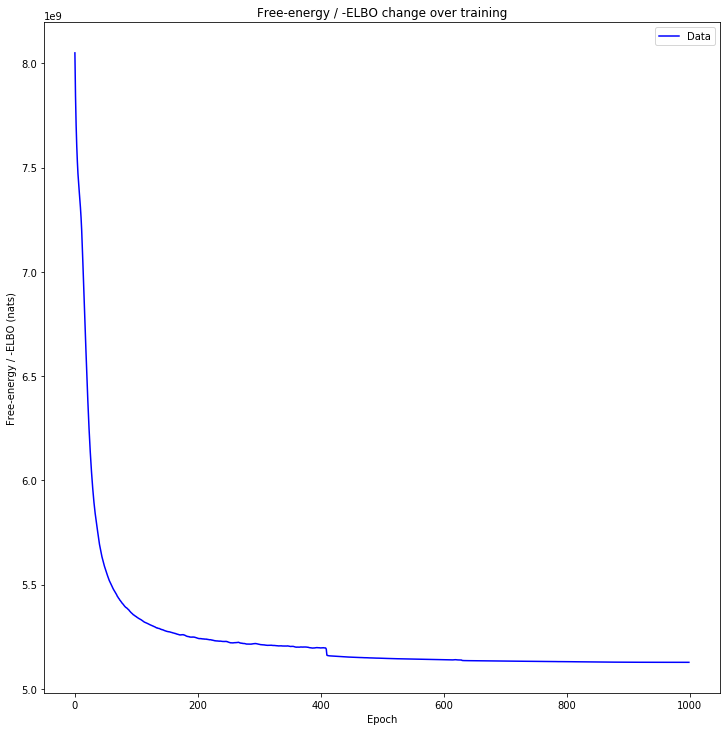

In [11]:
utils.plot_losses(losses)

In [12]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=False))

10/02/2020 22:22:27 [Epoch 1] (699ms) Posterior free-energy 1.27444890e+09 = KL from prior 9.41190469e+04 - log-likelihood -1.27435469e+09
10/02/2020 22:22:27 Saving checkpoint...
10/02/2020 22:22:28 [Epoch 2] (698ms) Posterior free-energy 1.26306227e+09 = KL from prior 9.27559375e+04 - log-likelihood -1.26296947e+09
10/02/2020 22:22:29 [Epoch 3] (698ms) Posterior free-energy 1.23222874e+09 = KL from prior 9.09011719e+04 - log-likelihood -1.23213786e+09
10/02/2020 22:22:29 [Epoch 4] (705ms) Posterior free-energy 1.20195098e+09 = KL from prior 8.74838828e+04 - log-likelihood -1.20186342e+09
10/02/2020 22:22:30 [Epoch 5] (718ms) Posterior free-energy 1.18046618e+09 = KL from prior 8.93717891e+04 - log-likelihood -1.18037683e+09
10/02/2020 22:22:31 [Epoch 6] (691ms) Posterior free-energy 1.15817152e+09 = KL from prior 8.44627891e+04 - log-likelihood -1.15808704e+09
10/02/2020 22:22:31 [Epoch 7] (687ms) Posterior free-energy 1.14734451e+09 = KL from prior 8.39789922e+04 - log-likelihood -1

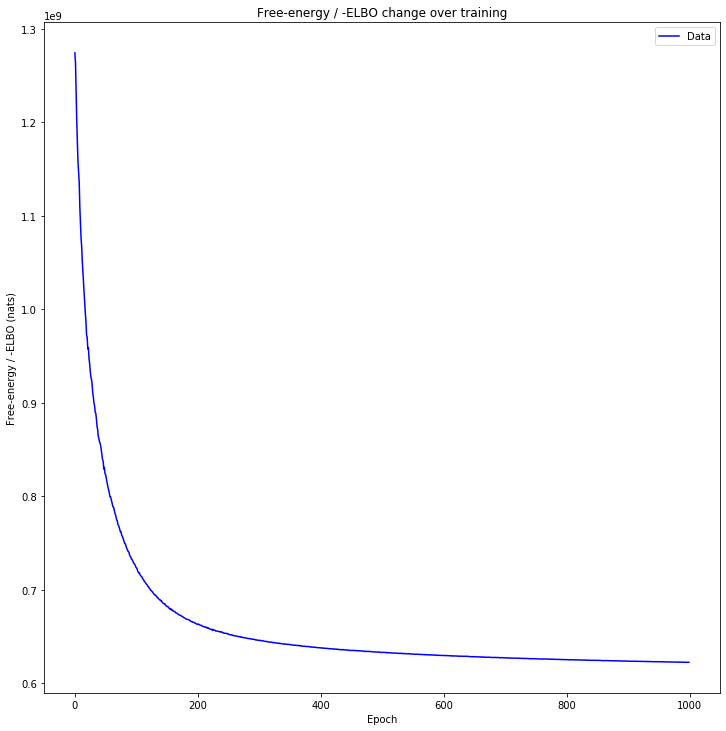

In [13]:
utils.plot_losses(losses)

In [14]:
def task_labeler(task):
    return task

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

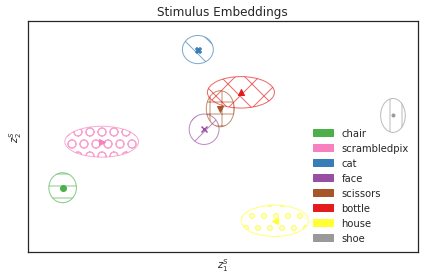

In [15]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='haxby_norest_task_embedding.pdf')

In [16]:
def subject_labeler(subject):
    return 'Subject %d' % subject

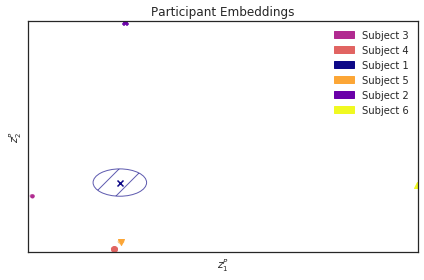

In [17]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [18]:
def block_task_labeler(b):
    task = b.task
    return task

10/02/2020 22:33:54 Plotting factors for Participant 6, run 8


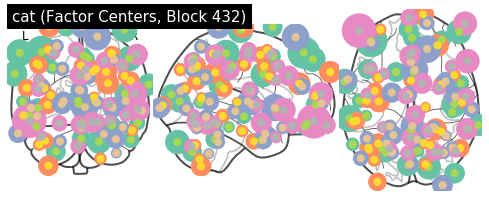

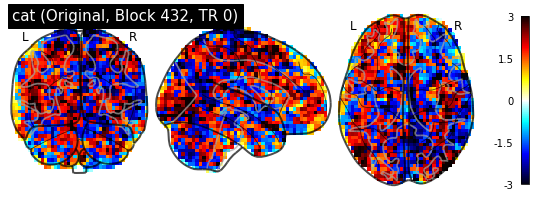

10/02/2020 22:33:57 Reconstruction Error (Frobenius Norm): 1.18158966e+02 out of 6.34683105e+02


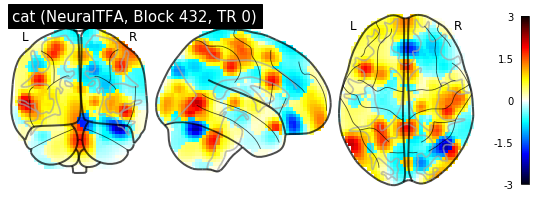

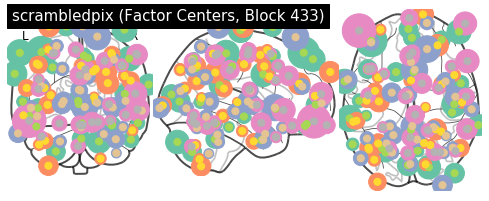

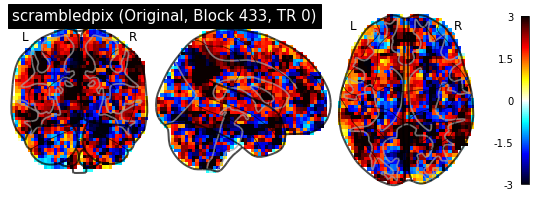

10/02/2020 22:34:00 Reconstruction Error (Frobenius Norm): 1.31150558e+02 out of 5.72112305e+02


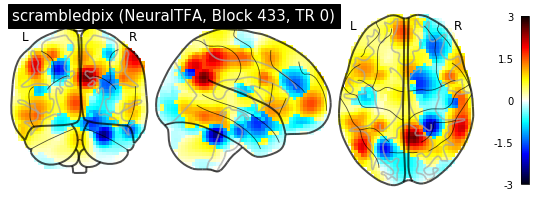

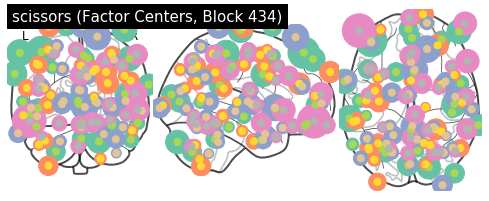

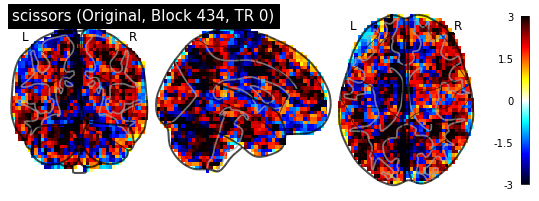

10/02/2020 22:34:03 Reconstruction Error (Frobenius Norm): 1.30830933e+02 out of 6.23831787e+02


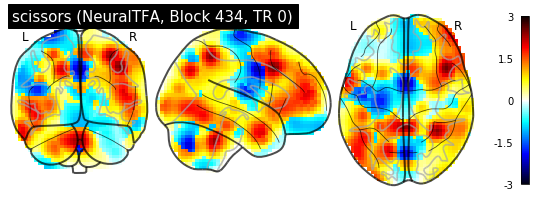

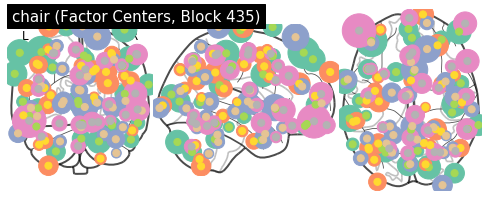

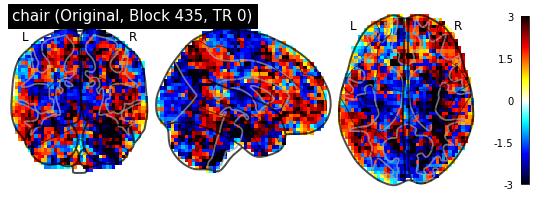

10/02/2020 22:34:05 Reconstruction Error (Frobenius Norm): 1.04041443e+02 out of 5.63255371e+02


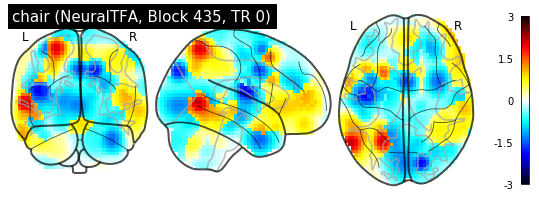

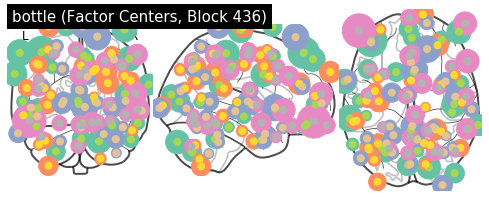

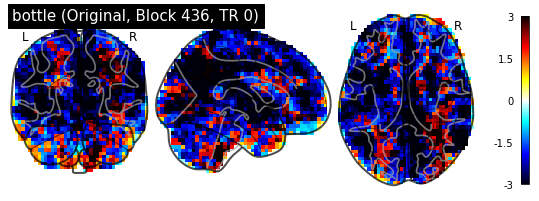

10/02/2020 22:34:08 Reconstruction Error (Frobenius Norm): 1.43419022e+02 out of 7.39638733e+02


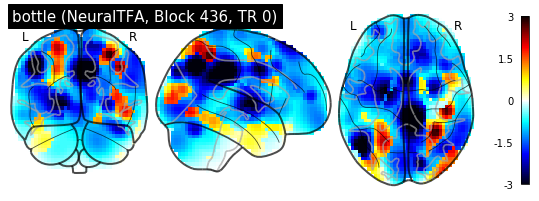

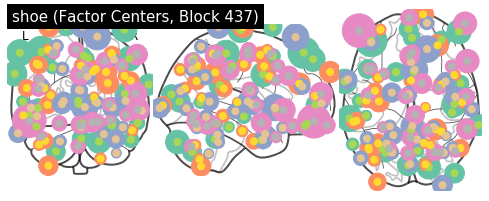

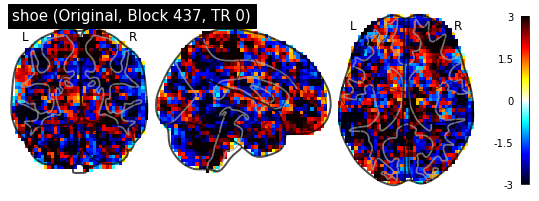

10/02/2020 22:34:11 Reconstruction Error (Frobenius Norm): 1.30473160e+02 out of 5.71527283e+02


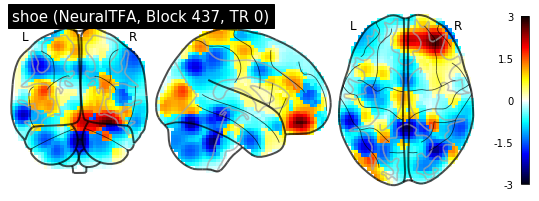

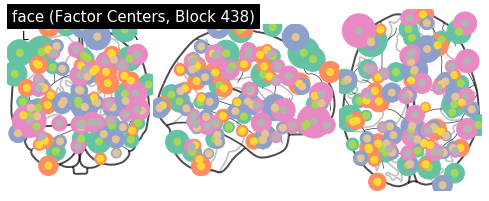

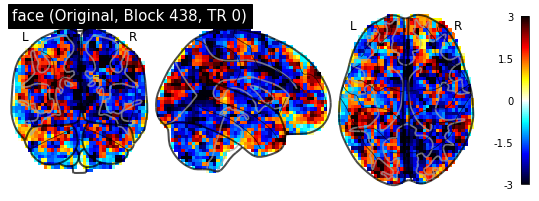

10/02/2020 22:34:14 Reconstruction Error (Frobenius Norm): 1.11437866e+02 out of 5.92858643e+02


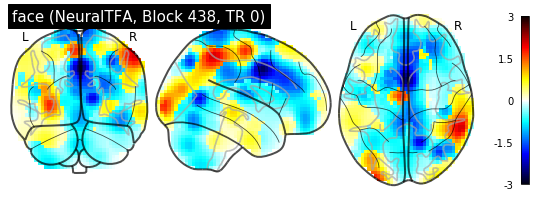

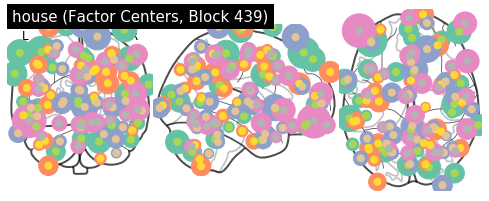

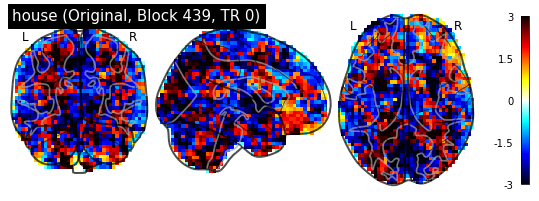

10/02/2020 22:34:17 Reconstruction Error (Frobenius Norm): 1.15127533e+02 out of 6.20795837e+02


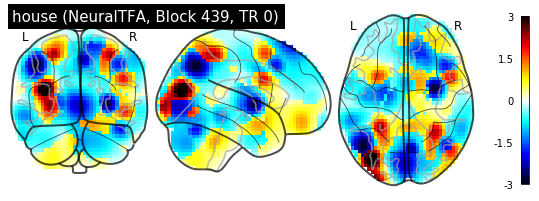

In [19]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

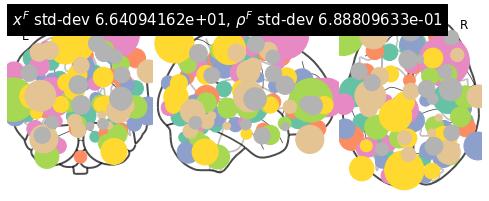

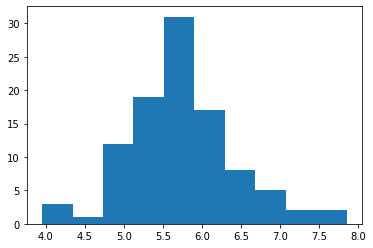

(<nilearn.plotting.displays.OrthoProjector at 0x7f926472dcd0>,
 tensor([[-31.6841, -46.4298, -20.5696],
         [ 40.3183, -14.5438,  57.1084],
         [ 35.6391, -62.6509, -20.8376],
         [-30.2668, -58.8141,  45.3366],
         [-21.5402,  34.0538,  27.2775],
         [  2.7577,  41.1244,  -9.9185],
         [ -4.6939, -83.8368, -11.1585],
         [ 16.0792, -75.5198,  35.3258],
         [-50.6539, -39.8633,  49.6173],
         [ 58.5076, -38.0450,  18.0497],
         [-58.6632,  -7.6748,  -1.5353],
         [ 15.8106, -79.8544, -32.8673],
         [-27.8371, -72.4914, -41.6172],
         [ 28.9411,  50.3147, -29.5922],
         [ -0.5817,   4.3523,  54.0072],
         [  3.4103,  21.7964,  52.5996],
         [ 32.1070, -76.9189,  30.8745],
         [ 45.4600,  23.0518,  25.1654],
         [  0.3890, -55.8099, -54.0098],
         [-61.5600, -56.2010,   8.8010],
         [ 42.5713,   3.6170, -25.5000],
         [-36.8313,  35.5970,  -3.6664],
         [ 58.6957, -44.7902,  49.7

In [20]:
dtfa.visualize_factor_embedding()

In [21]:
dtfa.average_reconstruction_error(weighted=False,
                                  blocks_filter=haxby_db.inference_filter(training=True))

10/02/2020 22:34:27 Average reconstruction error (MSE): 5.20899626e+02 +/- 4.25446448e+01
10/02/2020 22:34:27 Average data norm (Euclidean): 6.00373450e+02 +/- 6.10528137e+01
10/02/2020 22:34:27 Percent average reconstruction error: 86.999377 +/- 3.73690740e+00


(array([556.32446289, 528.67462158, 499.74472046, 449.05282593,
        469.94528198, 488.17990112, 547.40423584, 540.90057373,
        500.72521973, 497.36315918, 469.51782227, 500.06640625,
        478.66723633, 531.80163574, 499.66671753, 509.45846558,
        614.30847168, 548.00500488, 507.77172852, 530.69787598,
        476.41772461, 512.80645752, 513.91168213, 476.61813354,
        586.23950195, 523.37286377, 466.50024414, 493.17492676,
        528.90911865, 491.12640381, 504.91845703, 538.91363525,
        595.04199219, 499.28561401, 495.24243164, 520.25787354,
        524.15905762, 508.35058594, 543.54229736, 490.28344727,
        522.51867676, 534.42285156, 483.98562622, 456.18789673,
        507.2052002 , 553.17108154, 517.08178711, 547.96575928,
        453.49838257, 450.11791992, 466.90103149, 447.78244019,
        464.57168579, 465.18310547, 429.89926147, 494.8374939 ,
        502.73196411, 460.44897461, 409.52810669, 437.97729492,
        459.57260132, 455.068573  , 461.

In [22]:
dtfa.free_energy(batch_size=50, use_cuda=True, blocks_batch_size=10, num_particles=1, sample_size=100,
                 blocks_filter=haxby_db.inference_filter(training=False))

[[622296128.0, -622149440.0, 146748.390625],
 [622453376.0, -622022144.0, 147049.109375]]